<a href="https://colab.research.google.com/github/raghavsingraur/mlproject/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
# Step 1: Import necessary libraries
from google.colab import files
import pandas as pd

# Step 2: Upload the CSV file from local machine
uploaded = files.upload()

# Step 3: Get the uploaded file name (it will be a key in uploaded dictionary)
file_name = list(uploaded.keys())[0]

# Step 4: Read the CSV file using pandas
data = pd.read_csv(file_name)

# Step 5: Display first 5 rows to verify
data.head()


Saving boston.csv to boston (4).csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [48]:
print(data.head())
print(data.info())
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

In [49]:
# In the Boston Housing dataset:
# - 'RM' represents the average number of rooms per dwelling (used as a proxy for square footage)
# - 'MEDV' represents the median value of owner-occupied homes in $1000s

# Select predictor (average number of rooms) and target (median value)
X = data[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'AGE', 'CRIM']]

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = data['MEDV']

# Preview selected data
X.head(), y.head()



(      RM  LSTAT  PTRATIO    TAX   AGE     CRIM
 0  6.575   4.98     15.3  296.0  65.2  0.00632
 1  6.421   9.14     17.8  242.0  78.9  0.02731
 2  7.185   4.03     17.8  242.0  61.1  0.02729
 3  6.998   2.94     18.7  222.0  45.8  0.03237
 4  7.147   5.33     18.7  222.0  54.2  0.06905,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: MEDV, dtype: float64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (404, 6)
Testing set size: (102, 6)


In [51]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 12.87718823833738
Coefficients: [ 4.88606318e+00 -5.68582902e-01 -7.92239997e-01 -1.67483142e-03
  2.37543543e-02 -8.22316396e-02]


In [53]:
y_pred = model.predict(X_test)

# Display first few predictions
y_pred[:5]


array([27.4294401 , 30.29815155, 17.05961716, 23.82850055, 18.4686924 ])

In [54]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 28.06451934278456
R² Score: 0.6173043564187919


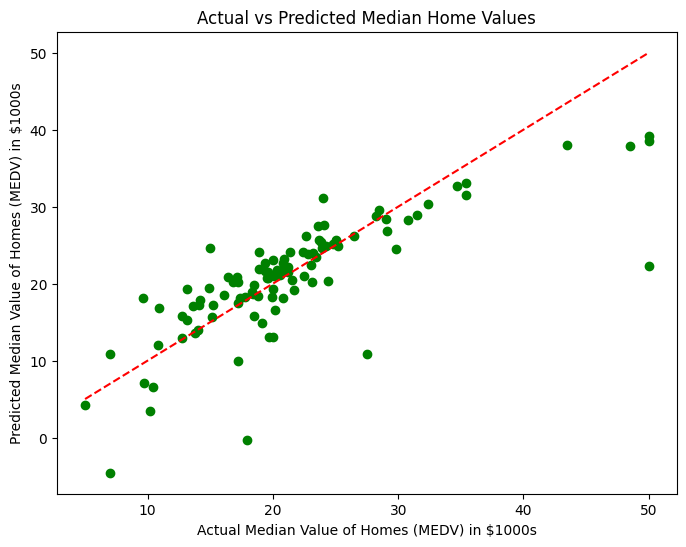

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Median Value of Homes (MEDV) in $1000s')
plt.ylabel('Predicted Median Value of Homes (MEDV) in $1000s')
plt.title('Actual vs Predicted Median Home Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()


In [56]:
print(f"Intercept (c): {model.intercept_}")
print(f"Coefficient (m): {model.coef_[0]}")

print(f"\nInterpretation: For every additional room, the median home value increases by approximately ${model.coef_[0] * 1000:.2f}.")


Intercept (c): 12.87718823833738
Coefficient (m): 4.8860631821768346

Interpretation: For every additional room, the median home value increases by approximately $4886.06.
